In [1]:
%pip install ultralytics


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ultralytics import YOLO

In [3]:
import os

# Get the current working directory
current_working_directory = os.getcwd()

print("Current working directory:", current_working_directory)


Current working directory: c:\Users\gorme\projects\godseye\apps\backend\dataset_processing


In [4]:
pose_model_path = current_working_directory + "/models/yolov8n-pose.pt"
model_path = current_working_directory + "/models/yolov8n.pt"
sample_video_path = current_working_directory + "/resources/test_videos/v_BaseballPitch_g01_c01.avi"
sample_image_path = current_working_directory + "/resources/pose-img.jpg"

In [5]:
# Load a model

model = YOLO(pose_model_path)  # build a new model from scratch
# model = YOLO(model_path)  # load a pretrained model (recommended for training)
results = model(source=sample_video_path, show=True, conf=0.3, save=True)




WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/107) c:\Users\gorme\projects\godseye\apps\backend\dataset_processing\resources\test_videos\v_BaseballPitch_g01_c01.avi: 480x640 1 person, 162.7ms
video 1/1 (frame 2/107) c:\Users\gorme\projects\godseye\apps\backend\dataset_processing\resources\test_videos\v_BaseballPitch_g01_c01.avi: 480x640 1 person, 110.2ms
video 1/1 (frame 3/107) c:\Users\gorme\projects\godseye\apps\backend\dataset_processing\resources\test_videos\v_BaseballPitch_g0

In [6]:
# Load a model
model = YOLO(pose_model_path)  # build a new model from scratch
# model = YOLO(model_path)  # load a pretrained model (recommended for training)

results = model(source=sample_image_path, show=True, conf=0.3)


image 1/1 c:\Users\gorme\projects\godseye\apps\backend\dataset_processing\resources\pose-img.jpg: 352x640 1 person, 226.7ms
Speed: 3.0ms preprocess, 226.7ms inference, 2.7ms postprocess per image at shape (1, 3, 352, 640)


In [ ]:
results

In [7]:
for result in results:
   boxes = result.boxes  # Boxes object for bbox outputs
   masks = result.masks  # Masks object for segmenation masks outputs
   probs = result.probs  # Class probabilities
   print(boxes)
   print(masks)
   print(probs)


boxes = results[0].boxes
box = boxes[0]  # returns one box
box.xyxy
boxes.xyxy  # box with xyxy format, (N, 4)
boxes.xywh  # box with xywh format, (N, 4)
boxes.xyxyn  # box with xyxy format but normalized, (N, 4)
boxes.xywhn  # box with xywh format but normalized, (N, 4)
boxes.conf  # confidence score, (N, 1)
boxes.cls  # cls, (N, 1)
boxes.data  # raw bboxes tensor, (N, 6) or boxes.boxes .

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8865])
data: tensor([[3.9500e+02, 5.5000e+01, 1.0570e+03, 6.1800e+02, 8.8651e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (700, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[726.0000, 336.5000, 662.0000, 563.0000]])
xywhn: tensor([[0.5672, 0.4807, 0.5172, 0.8043]])
xyxy: tensor([[ 395.,   55., 1057.,  618.]])
xyxyn: tensor([[0.3086, 0.0786, 0.8258, 0.8829]])
None
None


tensor([[3.9500e+02, 5.5000e+01, 1.0570e+03, 6.1800e+02, 8.8651e-01, 0.0000e+00]])

WARNING  'result.tojson()' is deprecated, replace with 'result.to_json()'.
[
  {
    "name": "person",
    "class": 0,
    "confidence": 0.88651,
    "box": {
      "x1": 0.30859,
      "y1": 0.07857,
      "x2": 0.82578,
      "y2": 0.88286
    },
    "keypoints": {
      "x": [
        0.3819499909877777,
        0.39261001348495483,
        0.3732300102710724,
        0.413239985704422,
        0.35499998927116394,
        0.43764999508857727,
        0.3488900065422058,
        0.43514999747276306,
        0.38231998682022095,
        0.3673799932003021,
        0.4340499937534332,
        0.4997999966144562,
        0.4047200083732605,
        0.6450899839401245,
        0.3561500012874603,
        0.7773399949073792,
        0.35378000140190125
      ],
      "y": [
        0.3074600100517273,
        0.28395000100135803,
        0.2785800099372864,
        0.2790200114250183,
        0.2533099949359894,
        0.36597999930381775,
        0.25933998823165894,
        0.55899000

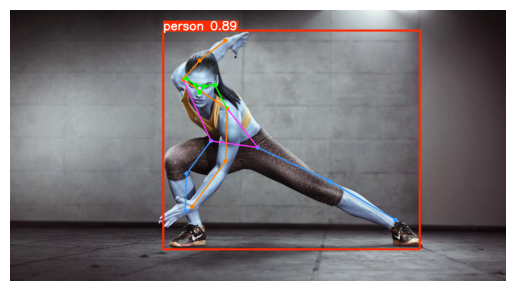

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your results object is named 'results'
for r in results:
    print(r.tojson(normalize=True))
    # r.save_crop(save_dir='sample')
    image_array = r.plot(conf=True, boxes=True)

    # Display the image
    plt.imshow(image_array)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()


## stream it

In [9]:
import cv2 
from ultralytics import YOLO

# load the model
model = YOLO(pose_model_path)

# open the video file path
# video_path = "./resources/pose-img.jpg"

video_path = 0
cap = cv2.VideoCapture(video_path)
def stream():
    # loop through the video frames
    while cap.isOpened():
        #read a frame
        success, frame = cap.read()
        
        if success:
            results = model(frame, save=True)
            
            #visualize the results
            annotated_frame = results[0].plot()
            
            cv2.imshow("Output", annotated_frame)
            
            #break the loop on key press q
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break
            
        else:
            #the video end is reached
            break

    cap.release()

## Making the datasett


0: 384x640 1 person, 102.5ms
Speed: 0.0ms preprocess, 102.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 93.0ms
Speed: 0.0ms preprocess, 93.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 89.8ms
Speed: 0.0ms preprocess, 89.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 94.7ms
Speed: 0.0ms preprocess, 94.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 123.1ms
Speed: 0.0ms preprocess, 123.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 99.3ms
Speed: 1.0ms preprocess, 99.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 87.4ms
Speed: 0.0ms preprocess, 87.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 83.4ms
Speed: 1.6ms preprocess, 83.4ms inference, 0.0ms postprocess per image at shape (1, 3

In [ ]:
import os
import json
import cv2
from ultralytics import YOLO
import numpy as np

# Initialize YOLO model
model = YOLO("yolov8_model_path.pt")  # Replace with your YOLO model path

# Define dataset paths
input_root_dir = 'archive/RWF-2000'  # Original dataset directory
output_root_dir = 'archive/processed_RWF-2000'  # Directory to save processed dataset

# Define categories and subcategories
sets = ['train', 'val']
categories = ['Fight', 'NonFight']

# Loop through each set and category
for set_name in sets:
    for category in categories:
        input_dir = os.path.join(input_root_dir, set_name, category)
        output_dir = os.path.join(output_root_dir, set_name, category)
        os.makedirs(output_dir, exist_ok=True)

        # Loop through videos in the current category
        for video_file in os.listdir(input_dir):
            if video_file.endswith('.avi'):  # Process only .avi files
                video_name = os.path.splitext(video_file)[0]
                video_input_path = os.path.join(input_dir, video_file)

                # Create a subfolder for each video in the output directory
                video_output_dir = os.path.join(output_dir, video_name)
                os.makedirs(video_output_dir, exist_ok=True)

                # Paths for saving original and processed videos, and keypoints
                original_video_path = os.path.join(video_output_dir, 'original.avi')
                processed_video_path = os.path.join(video_output_dir, 'processed.avi')
                keypoints_path = os.path.join(video_output_dir, 'keypoints.jsonl')

                # Open the input video
                cap = cv2.VideoCapture(video_input_path)
                fps = cap.get(cv2.CAP_PROP_FPS)
                width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

                # Set up video writers for original and processed videos
                out_original = cv2.VideoWriter(original_video_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))
                out_processed = cv2.VideoWriter(processed_video_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

                # Open keypoints file for writing
                with open(keypoints_path, 'w') as kp_file:
                    frame_idx = 0
                    while cap.isOpened():
                        ret, frame = cap.read()
                        if not ret:
                            break

                        # Save the original frame
                        out_original.write(frame)

                        # Run YOLO model to get keypoints and process the frame
                        results = model(frame)
                        keypoints = results[0].keypoints.cpu().numpy().tolist()  # Convert keypoints to list

                        # Save keypoints for this frame to JSONL file
                        json.dump({"frame": frame_idx, "keypoints": keypoints}, kp_file)
                        kp_file.write('\n')

                        # Draw keypoints on frame and save to processed video
                        frame_with_keypoints = results[0].plot()
                        out_processed.write(frame_with_keypoints)

                        frame_idx += 1

                # Release resources
                cap.release()
                out_original.release()
                out_processed.release()

print(f"Processed dataset saved in '{output_root_dir}' directory.")
